# Planning our photometric observations

I like using astroplan to plan my observations. You can find more information here: https://astroplan.readthedocs.io/en/latest/

In [34]:
# userful packages
import numpy as np
import matplotlib.pyplot as plt
import astroquery.ned as NED
import astropy.coordinates as coords
import astropy.units as u
from astropy.io import ascii
from astropy.time import Time
import astroplan as ap
import astroplan.plots as app


In [ ]:
# make sure stuff is up to date
from astroplan import download_IERS_A
import astropy.utils as utils
# utils.iers.IERS_A_URL = 'http://toshi.nofs.navy.mil/ser7/finals2000A.all'
# ap.download_IERS_A()

In [22]:
# load our target list
targetlist = ascii.read('../targets/Targets.csv')
targetlist.colnames

['\ufeffName',
 'RA',
 'Dec',
 'Morph',
 'Mag',
 'Filter',
 'Exp_B',
 'Exp_V',
 'Exp_r',
 'Exp_i',
 'Exp_Ha',
 'z',
 'Notes']

In [32]:
# set the observer and the time
site = ap.Observer.at_site('lasilla')
moon = site.moon_altaz(time_grid) # the moon :) 
time_grid = Time(['2020-02-10 18:00']) + np.arange(0, 13, 0.1)*u.hour


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [33]:
target = ap.FixedTarget.from_name(targetlist['\ufeffName'][0])


We can now plot the visibilities of this object as well as a finding chart. An ideal finding chart also has the field of view on it. 

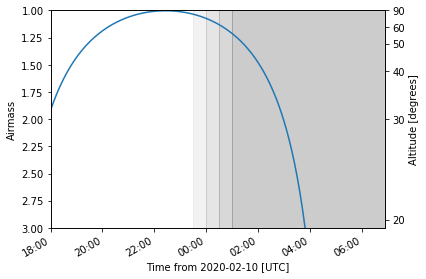

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
app.plot_airmass(target, site, time_grid, 
                 brightness_shading=True, altitude_yaxis=True,
                 ax=ax)

(<matplotlib.axes._subplots.WCSAxesSubplot at 0x11c5d9dd0>,
 <astropy.io.fits.hdu.image.PrimaryHDU at 0x11c5c3f10>)

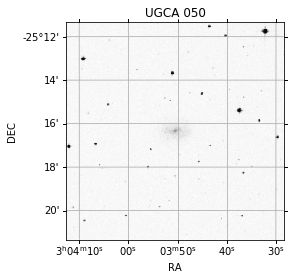

In [27]:
app.plot_finder_image(target)

In [52]:
1/np.cos(np.deg2rad(moon.zen))

<Quantity [ -1.05181701,  -1.05016363,  -1.04909219,  -1.04859998,
            -1.04868588,  -1.04935036,  -1.05059544,  -1.05242477,
            -1.05484361,  -1.05785885,  -1.06147913,  -1.06571482,
            -1.07057813,  -1.0760832 ,  -1.0822462 ,  -1.08908541,
            -1.09662142,  -1.10487723,  -1.11387843,  -1.12365346,
            -1.13423375,  -1.14565405,  -1.15795271,  -1.17117197,
            -1.18535842,  -1.20056337,  -1.21684338,  -1.23426081,
            -1.25288449,  -1.27279043,  -1.29406272,  -1.31679449,
            -1.34108907,  -1.36706131,  -1.39483912,  -1.42456532,
            -1.45639974,  -1.49052172,  -1.52713311,  -1.5664618 ,
            -1.60876595,  -1.6543391 ,  -1.70351632,  -1.75668172,
            -1.81427769,  -1.87681622,  -1.94489304,  -2.01920541,
            -2.10057449,  -2.18997408,  -2.28856765,  -2.39775671,
            -2.51924486,  -2.65512359,  -2.80798918,  -2.98110456,
            -3.17862776,  -3.40594109,  -3.67013737,  -3.98075